In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

import re 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Importing evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
url3 = 'https://www.airlinequality.com/airline-reviews/british-airways/page/1'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(url3, headers=headers)

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

header = [] 
total_rating = [] 
reviews = [] 
date_flown = [] 
country = []
route = []
aircraft = [] 
traveller_type = [] 
seat_type = [] 
seat_comfort = [] 
cabin_staff_service = [] 
food_and_beverages = []
ground_service = []
value_for_money = []
recommended = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extracting data from each review
    for review in parsed_content.find_all("article", itemprop="review"):
        # Extracting header
        header.append(review.find("h2", class_="text_header").get_text(strip=True))

        # Extracting total rating
        #total_rating.append(review.find("span", itemprop="ratingValue").get_text(strip=True))

        # Extracting review text
        reviews.append(review.find("div", class_="text_content").get_text(strip=True))

        # Handling missing information gracefully
        try:
            country.append(review.find("h3").text.split('(')[-1].strip(')'))
        except AttributeError:
            country.append(None)
            
        try:
            route_type = review.find('td', class_='review-rating-header', text='Route').find_next_sibling('td').get_text(strip=True)
        except AttributeError:
            route_type = None
        route.append(route_type)
            
        try:
            total_rating.append(review.find("span", itemprop="ratingValue").get_text(strip=True))
        except AttributeError:
            total_rating.append(None)
        
        try:
            aircraft_type = review.find('td', class_='review-rating-header', text='Aircraft').find_next_sibling('td').get_text(strip=True)
        except AttributeError:
            aircraft_type = None
        aircraft.append(aircraft_type)
            
        try:
            type_of_traveller = review.find('td', class_='review-rating-header', text='Type Of Traveller').find_next_sibling('td').get_text(strip=True)
        except AttributeError:
            type_of_traveller = None
        traveller_type.append(type_of_traveller)

        try:
            seat = review.find('td', class_='review-rating-header', text='Seat Type').find_next_sibling('td').get_text(strip=True)
        except AttributeError:
            seat = None
        seat_type.append(seat)

        try:
            date = review.find('td', class_='review-rating-header', text='Date Flown').find_next_sibling('td').get_text(strip=True)
        except AttributeError:
            date = None
        date_flown.append(date)

        try:
            recommend = review.find('td', class_='review-rating-header', text='Recommended').find_next_sibling('td').get_text(strip=True)
        except AttributeError:
            recommend = None
        recommended.append(recommend)

        # Extracting ratings and finding the maximum number of 'star fill' elements
        ratings = {}
        rating_categories = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money']
        for category in rating_categories:
            try:
                rating_elements = review.find('td', class_='review-rating-header', text=category).find_next_sibling('td').find_all('span', class_='star fill')
                ratings[category] = len(rating_elements)
            except AttributeError:
                ratings[category] = None

        seat_comfort.append(ratings.get('Seat Comfort'))
        cabin_staff_service.append(ratings.get('Cabin Staff Service'))
        food_and_beverages.append(ratings.get('Food & Beverages'))
        ground_service.append(ratings.get('Ground Service'))
        value_for_money.append(ratings.get('Value For Money'))

print("Data scraped successfully!")

# Creating DataFrame
data = {
    "Header": header,
    "Total Rating": total_rating,
    "Review": reviews,
    "Date Flown": date_flown,
    "Country": country,
    "Aircraft": aircraft,
    "Type of Traveller": traveller_type,
    "Seat Type": seat_type,
    "Route": route,
    "Seat Comfort": seat_comfort,
    "Cabin Staff Service": cabin_staff_service,
    "Food & Beverages": food_and_beverages,
    "Ground Service": ground_service,
    "Value For Money": value_for_money,
    "Recommended": recommended
}

df = pd.DataFrame(data)

Scraping page 1


C:\Users\hp\AppData\Local\Temp\ipykernel_16632\3425427293.py:52: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  route_type = review.find('td', class_='review-rating-header', text='Route').find_next_sibling('td').get_text(strip=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16632\3425427293.py:63: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  aircraft_type = review.find('td', class_='review-rating-header', text='Aircraft').find_next_sibling('td').get_text(strip=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16632\3425427293.py:69: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  type_of_traveller = review.find('td', class_='review-rating-header', text='Type Of Traveller').find_next_sibling('td').get_text(strip=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16632\3425427293.py:75: DeprecationWarning: The 'text' argument to fin

Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Data scraped successfully!


In [17]:
df.to_csv(r'C:\Users\hp\Desktop\Data analysis\Python\Project\web scraping\British Airways\BA_reviews.csv')

In [18]:
df.head()

,Header,Total Rating,Review,Date Flown,Country,Aircraft,Type of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,new_review
0,"""The flights were okay""",6,✅Trip Verified| We chose Rotterdam and London...,March 2024,Netherlands,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,3.0,3.0,3.0,3.0,2,no,"""The flights were okay"" ✅Trip Verified| We ch..."
1,“entire experience has been stressful”,1,✅Trip Verified| The entire booking and ticketi...,April 2024,United States,None,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,2.0,3.0,NaN,3.0,1,no,“entire experience has been stressful” ✅Trip V...
2,"""whole experience was awful""",1,Not Verified| British Airways cancelled my f...,January 2024,United States,None,Family Leisure,Economy Class,Tenerife to London,NaN,NaN,NaN,1.0,1,no,"""whole experience was awful"" Not Verified| B..."
3,“This is true service”,10,Not Verified| I wanted to write this review so...,March 2024,United States,A340,Business,Business Class,Lisbon to San Diego,3.0,4.0,3.0,5.0,4,yes,“This is true service” Not Verified| I wanted ...
4,"""Flight attendants welcoming""",7,✅Trip Verified| Check in fast and friendly. S...,March 2024,United Kingdom,Boeing 787,Business,Business Class,London Heathrow to Mumbai,3.0,5.0,3.0,4.0,3,yes,"""Flight attendants welcoming"" ✅Trip Verified| ..."


In [19]:
# extracting the country name
df['Country'] = df['Country'].str.split(')').str[0].str.strip()

In [20]:
df.head()

,Header,Total Rating,Review,Date Flown,Country,Aircraft,Type of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,new_review
0,"""The flights were okay""",6,✅Trip Verified| We chose Rotterdam and London...,March 2024,Netherlands,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,3.0,3.0,3.0,3.0,2,no,"""The flights were okay"" ✅Trip Verified| We ch..."
1,“entire experience has been stressful”,1,✅Trip Verified| The entire booking and ticketi...,April 2024,United States,None,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,2.0,3.0,NaN,3.0,1,no,“entire experience has been stressful” ✅Trip V...
2,"""whole experience was awful""",1,Not Verified| British Airways cancelled my f...,January 2024,United States,None,Family Leisure,Economy Class,Tenerife to London,NaN,NaN,NaN,1.0,1,no,"""whole experience was awful"" Not Verified| B..."
3,“This is true service”,10,Not Verified| I wanted to write this review so...,March 2024,United States,A340,Business,Business Class,Lisbon to San Diego,3.0,4.0,3.0,5.0,4,yes,“This is true service” Not Verified| I wanted ...
4,"""Flight attendants welcoming""",7,✅Trip Verified| Check in fast and friendly. S...,March 2024,United Kingdom,Boeing 787,Business,Business Class,London Heathrow to Mumbai,3.0,5.0,3.0,4.0,3,yes,"""Flight attendants welcoming"" ✅Trip Verified| ..."


In [21]:
df.shape

(3007, 16)

In [22]:
# checking for missing data
df.isnull().sum()

Header                    0
Total Rating              0
Review                    0
Date Flown                0
Country                   0
Aircraft               1040
Type of Traveller         3
Seat Type                 1
Route                     5
Seat Comfort            120
Cabin Staff Service     132
Food & Beverages        404
Ground Service           71
Value For Money           0
Recommended               0
new_review                0
dtype: int64

In [23]:
# Not working with the other columns with missing values for this project

# Drop rows with missing values in the 'Total Rating'  and data_flown column
df.dropna(subset=['Total Rating', 'Date Flown'], inplace=True)

In [24]:
# checking for missing values
df.isnull().sum()

Header                    0
Total Rating              0
Review                    0
Date Flown                0
Country                   0
Aircraft               1040
Type of Traveller         3
Seat Type                 1
Route                     5
Seat Comfort            120
Cabin Staff Service     132
Food & Beverages        404
Ground Service           71
Value For Money           0
Recommended               0
new_review                0
dtype: int64

In [25]:
# checking distribution and types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3007 entries, 0 to 3007
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Header               3007 non-null   object 
 1   Total Rating         3007 non-null   object 
 2   Review               3007 non-null   object 
 3   Date Flown           3007 non-null   object 
 4   Country              3007 non-null   object 
 5   Aircraft             1967 non-null   object 
 6   Type of Traveller    3004 non-null   object 
 7   Seat Type            3006 non-null   object 
 8   Route                3002 non-null   object 
 9   Seat Comfort         2887 non-null   float64
 10  Cabin Staff Service  2875 non-null   float64
 11  Food & Beverages     2603 non-null   float64
 12  Ground Service       2936 non-null   float64
 13  Value For Money      3007 non-null   int64  
 14  Recommended          3007 non-null   object 
 15  new_review           3007 non-null   object

In [26]:
# checking the number of reviews that are verified
verified = df['Review'].str.contains('Trip Verified')
verified.value_counts()

Review
False    1794
True     1213
Name: count, dtype: int64

In [27]:
# Merging Header and Review columns together
df['new_review'] = df['Header'] + ' ' + df['Review']

In [28]:
import nltk
nltk.download('stopwords')

def stemming(content):
    # Initialize a stemmer
    port_stem = PorterStemmer()
    
    # Replace non-alphabetic characters with a space
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    
    # Tokenize the text into words
    stemmed_content = stemmed_content.split()
    
    # Perform stemming and remove stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    
    # Join the stemmed words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# applying stemming to the new_review column
df['content'] = df['new_review'].apply(stemming)

In [30]:
# Convert 'Total Rating' column to numeric
df['Total Rating'] = pd.to_numeric(df['Total Rating'], errors='coerce')

# Check the data type after conversion
print(df['Total Rating'].dtype)

int64


In [31]:
# calculating the average ratings for the data collected
round(df['Total Rating'].mean(),2)

4.41

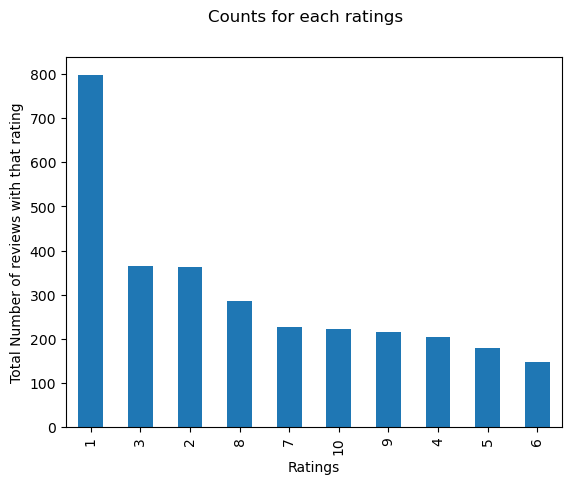

In [32]:
# plotting a graph showing the sum of ratings for each score
df['Total Rating'].value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings");

              count  pct_values
Total Rating                   
1               798       26.54
3               364       12.11
2               362       12.04
8               286        9.51
7               226        7.52
10              223        7.42
9               216        7.18
4               205        6.82
5               180        5.99
6               147        4.89


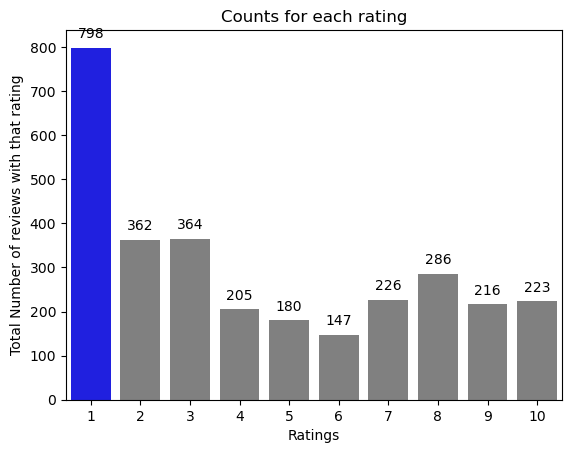

<Figure size 1000x800 with 0 Axes>

In [82]:
# Create DataFrame with value counts of 'Total Rating'
df_ratings = pd.DataFrame(df['Total Rating'].value_counts())
# df_ratings

# Calculate percentage values
pct_values = (df_ratings['count'].values / df_ratings['count'].values.sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_ratings['pct_values'] = pct_values
print(df_ratings)

# Reset index to make 'Total Rating' a regular column
df_ratings.reset_index(inplace=True)

# Rename columns
df_ratings.rename(columns={'index': 'Total Rating', 'count': 'count'}, inplace=True)

# Plotting the bar chart
clrs = ['blue' if (x == max(df_ratings['count'])) else 'grey' for x in df_ratings['count']]
ax = sns.barplot(x=df_ratings['Total Rating'], y=df_ratings['count'], palette=clrs)

# Adding labels to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')

plt.figure(figsize=(10,8))  # Set the figure size before plotting

# Setting labels and title
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each rating")

plt.show();

In [34]:
# Unique countries BA recieved the reviews from

print(f"{len(df.Country.unique())} unique Countries")

69 unique Countries


In [35]:
# Extract destination if 'to' is present and 'Route' is not None, else set destination as NaN
df['Destination'] = df['Route'].apply(lambda x: x.split(' to ')[1] if x is not None and ' to ' in x else None)

In [36]:
df['Destination'].value_counts()

Destination
London                  434
LHR                     215
London Heathrow         185
Gatwick                  82
LGW                      42
                       ... 
London heathrow           1
Bucharest via London      1
San Jose                  1
Baltimore                 1
SOF                       1
Name: count, Length: 672, dtype: int64

#Importing missing values 

#Columns with missing values
columns_with_missing = ['Total Rating', 'Review', 'Date Flown', 'Aircraft', 
                        'Type of Traveller', 'Seat Type', 'Route', 'Seat Comfort', 
                        'Cabin Staff Service', 'Food & Beverages', 'Ground Service']

#Replace missing values with median or mode
for column in columns_with_missing:
    if df[column].dtype == 'object':
        # If the column is of object type (e.g., string), replace missing values with the mode
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:
        # If the column is numeric, replace missing values with the median
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

In [37]:
# Group Total Rating into three categories
df['Rating_gp'] = pd.cut(df['Total Rating'], bins=[0, 3, 6, 10], labels=['bad', 'average', 'good'])

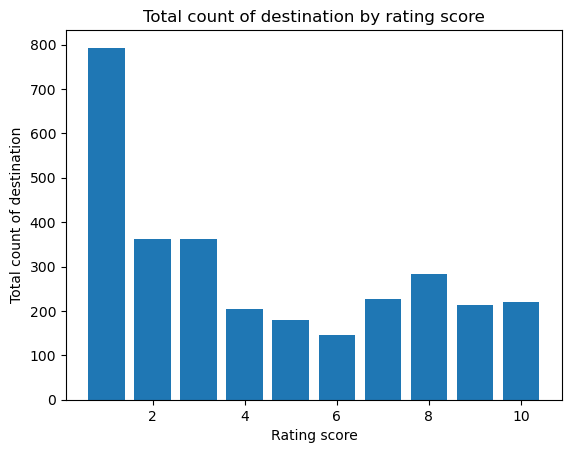

In [38]:
# Convert 'Total Rating' column to numeric type
df['Total Rating'] = pd.to_numeric(df['Total Rating'], errors='coerce')

# Calculate total count of destination for each Total Rating
destination_rating_count = df.groupby('Total Rating')['Destination'].count().reset_index()

# Sort the DataFrame by total count of destination in descending order
destination_rating_count = destination_rating_count.sort_values(by='Destination', ascending=False)

# Plotting a bar graph
plt.bar(x=destination_rating_count['Total Rating'], height=destination_rating_count['Destination'])
plt.xlabel('Rating score')
plt.ylabel('Total count of destination')
plt.title('Total count of destination by rating score')
plt.show();

In [42]:
df['Date Flown']

0         March 2024
1         April 2024
2       January 2024
3         March 2024
4         March 2024
            ...     
3003        May 2015
3004        May 2015
3005       June 2015
3006       June 2015
3007        May 2015
Name: Date Flown, Length: 3007, dtype: object

In [47]:
# changing the data type
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y')
df['Year'] = df['Date Flown'].dt.year

Year
2014    6.111111
2015    5.094937
2016    4.843694
2017    3.858929
2018    4.511834
2019    4.747024
2020    4.031915
2021    4.301075
2022    3.940092
2023    3.394161
2024    4.448980
Name: Total Rating, dtype: float64


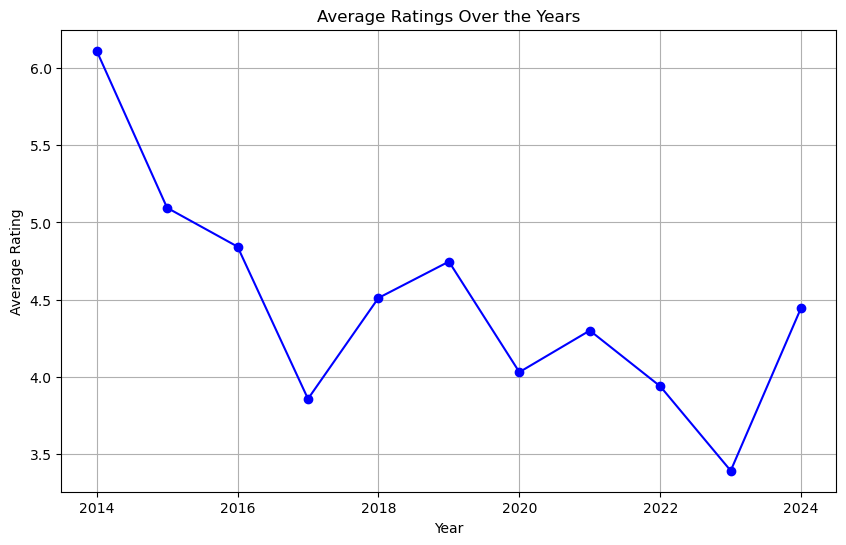

In [83]:
# Grouping data by year and calculating the average rating
avg_ratings = df.groupby('Year')['Total Rating'].mean()
print(avg_ratings)

# Plotting line graph for years against average ratings
plt.figure(figsize=(10, 6))
plt.plot(avg_ratings.index, avg_ratings.values, marker='o', linestyle='-', color='blue')
plt.title('Average Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show();

- The average ratings seem to fluctuate over the years, indicating varying levels of customer satisfaction or experiences with the airline.
- Initially, from 2014 to 2016, there's a slight decline in average ratings, suggesting a potential decrease in customer satisfaction or quality of service during this period.
- From 2016 onwards, there's some improvement in average ratings, with fluctuations observed in subsequent years.

          Country  count
0  United Kingdom   1856
1   United States    360
2       Australia    109
3          Canada     99
4         Germany     61


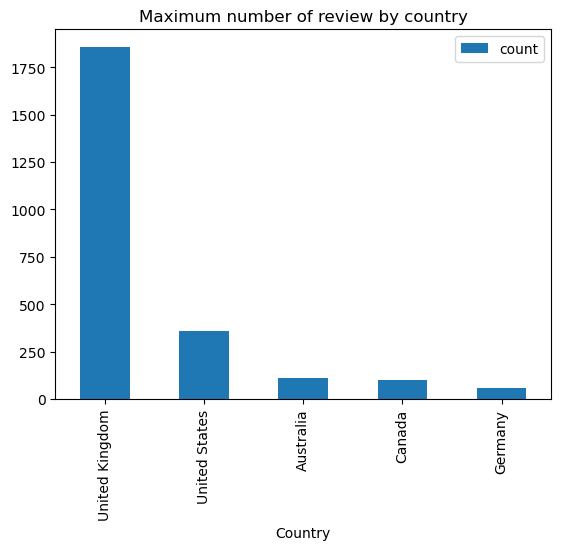

In [52]:
# checking for countries with most reviews
df_country_review = pd.DataFrame(df.Country.value_counts().head()).reset_index()
print(df_country_review)
#df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
df_country_review.plot(kind="bar", x='Country')
plt.title("Maximum number of review by country");

In [ ]:
#!pip install WordCloud

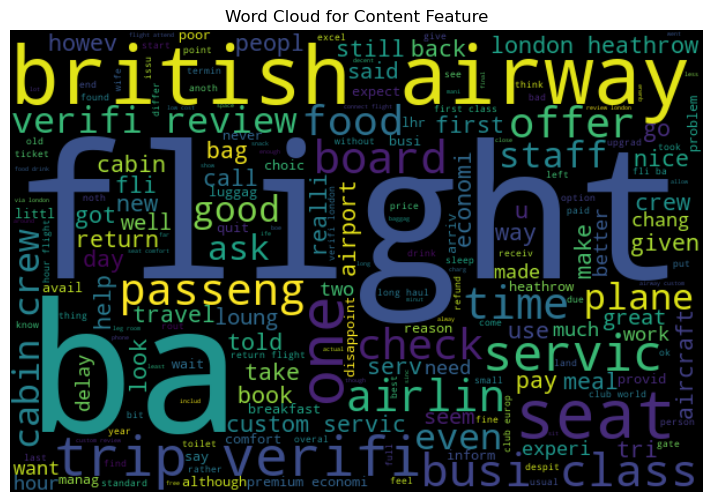

In [53]:
from wordcloud import WordCloud

# Combine all text in the 'content' column into a single string
text = ' '.join(df['content'])

# Generate word cloud
wordcloud = WordCloud(width=600, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Content Feature')
plt.show();

In [56]:
# some words from the word cloud are not useful in analyzing the experience of the customers.
from nltk.corpus import stopwords

# Add additional words to the stopwords list
additional_stopwords = ['ba', 'flight', 'british', 'airway', 'review', 'travel', 'one', 'airline', 'plane', 'told', 'also', 'passenger', 'london', 'heathrow', 'aircraft', 'could', 'even', 'would']
stopwords_list = stopwords.words('english') + additional_stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Function for stemming and removing stopwords
def stemming(content):
    # Initialize a stemmer
    port_stem = PorterStemmer()
    
    # Replace non-alphabetic characters with a space
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    
    # Tokenize the text into words
    stemmed_content = stemmed_content.split()
    
    # Perform stemming and remove stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords_list]
    
    # Join the stemmed words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

# Apply stemming and stopword removal to the 'Review' column
df['content'] = df['Review'].apply(stemming)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


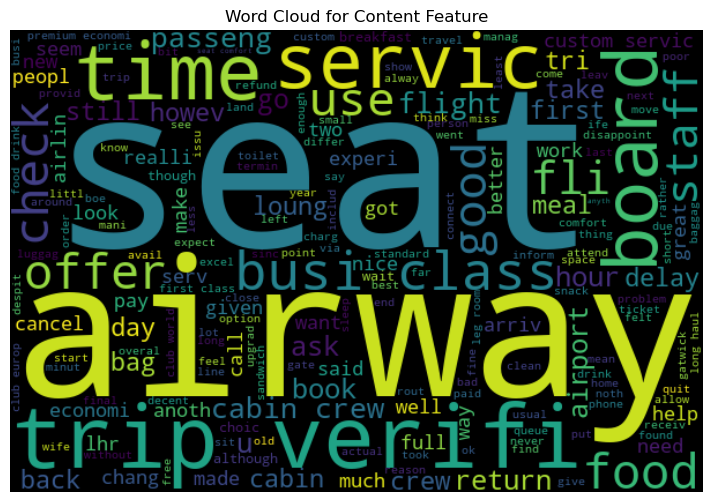

In [57]:
# building another word cloud after removing the extra redundant words

# Combine all text in the 'content' column into a single string
text = ' '.join(df['content'])

# Generate word cloud
wordcloud = WordCloud(width=600, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Content Feature')
plt.show();

#### General Observations:
The most prominent words are positive words, such as “good”,  “service”,  “comfortable”, and  “staff”. This suggests that many customers had a positive experience with the airline. Other positive words include "recommend", "easy", "pleasant", and "crew", which indicate positive aspects of the service, staff, and overall experience.

Here are some other insights that can be gleaned from the word cloud:

- Some customers mentioned negative words, such as “delayed”, “cancelled”, and “long”. This suggests that some customers had negative experiences, such as delayed or cancelled flights.
- Words like "price", "value", and "money" show that price is a factor for some customers.
- Words like "luggage", "fees", and "lost" could indicate frustration with baggage handling or fees.
- Words like "food", "selection", and "quality" could be related to in-flight food service.
- Some customers mentioned “entertainment” options.

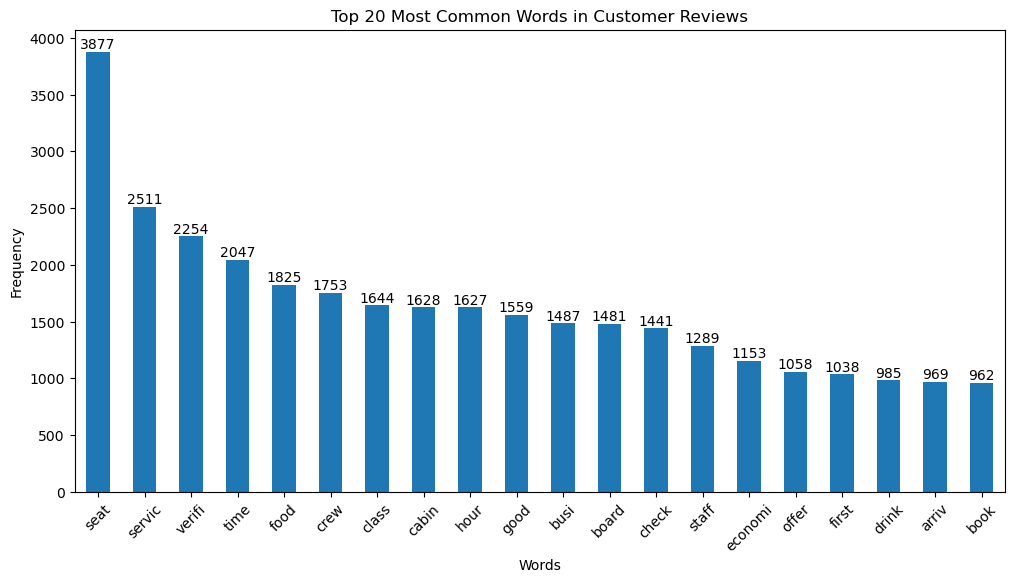

In [62]:
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.corpus import stopwords  # Import stopwords from NLTK corpus

# split the text of content column
words = []
for word in df['content']:
    words.extend(word.split())

# Filter out the additional words you highlighted earlier
custom_stopwords = ['ba', 'fli', 'one', 'get', 'us','trip','flight', 'review', 'travel','british', 'airway', 'airline', 'plane', 'told', 'also', 'passenger', 'london', 'heathrow', 'aircraft', 'could', 'even', 'would']
stopwords_list = list(stopwords.words('english'))  # Convert stopwords to a list
stopwords_list.extend(custom_stopwords)  # Add custom stopwords

new_words = [word for word in words if word not in stopwords_list]

# Create a frequency distribution of words
freq_dist = FreqDist(new_words).most_common(20)

# creating a dataframe of the the top 20 words with their distribution
all_freqdist = pd.Series(dict(freq_dist))
# print(all_freqdist)

# Plot the frequency distribution
plt.figure(figsize=(12, 6))
bar_plot = all_freqdist.plot(kind='bar')
plt.title('Top 20 Most Common Words in Customer Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Display frequency values on top of each bar
for idx, value in enumerate(all_freqdist):
    bar_plot.text(idx, value, str(value), ha='center', va='bottom')
plt.show();

<Axes: >

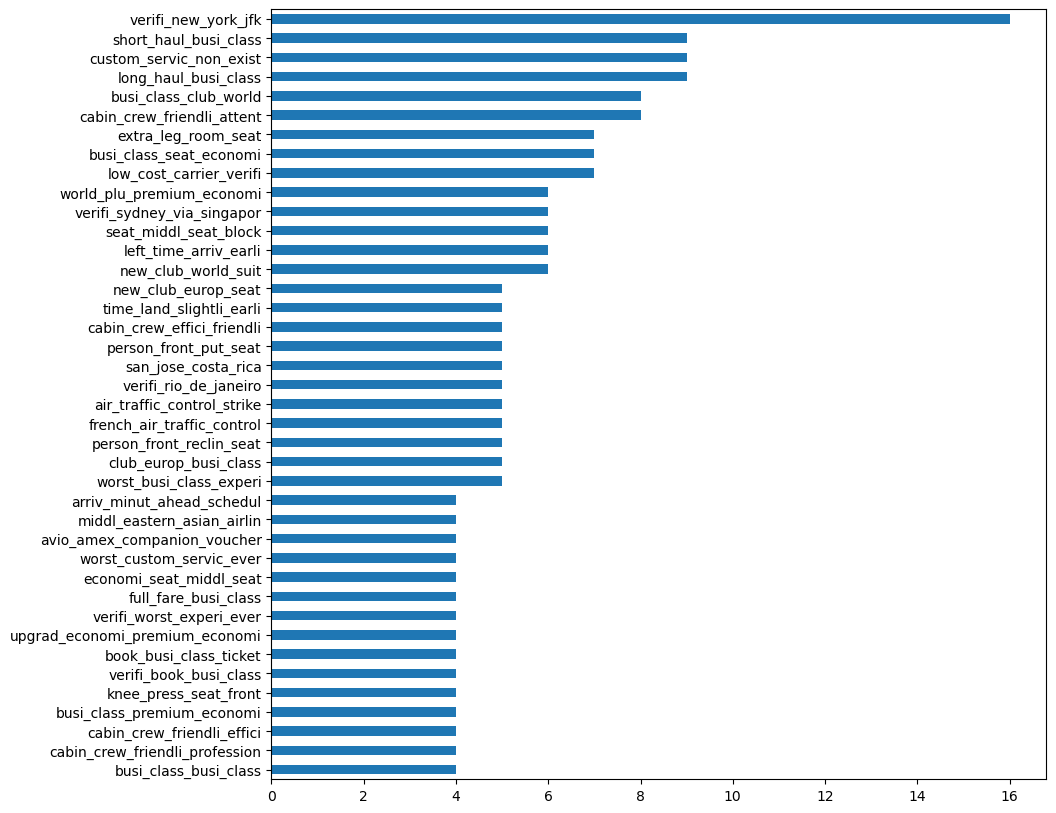

In [85]:
from nltk import ngrams as nltk_ngrams
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def get_freq_dist(new_words, number_of_grams):
    # generate ngrams
    ngram = nltk_ngrams(new_words, number_of_grams)
    
    # create a frequency distribution
    ngram_fd = FreqDist(ngram).most_common(40)
    
    # sort values by highest frequency
    ngram_sorted = {k:v for k, v in sorted(ngram_fd, key=lambda item: item[1])}
    
    # join ngram tokens with '-' and maintain sorting
    ngram_joined = {'_'.join(k):v for k, v in sorted(ngram_fd, key=lambda item: item[1])}
    
    # convert to pandas Series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    #print(ngram_freqdist)
    
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind='barh')
    return ax

# Call the function
get_freq_dist(new_words, 4)

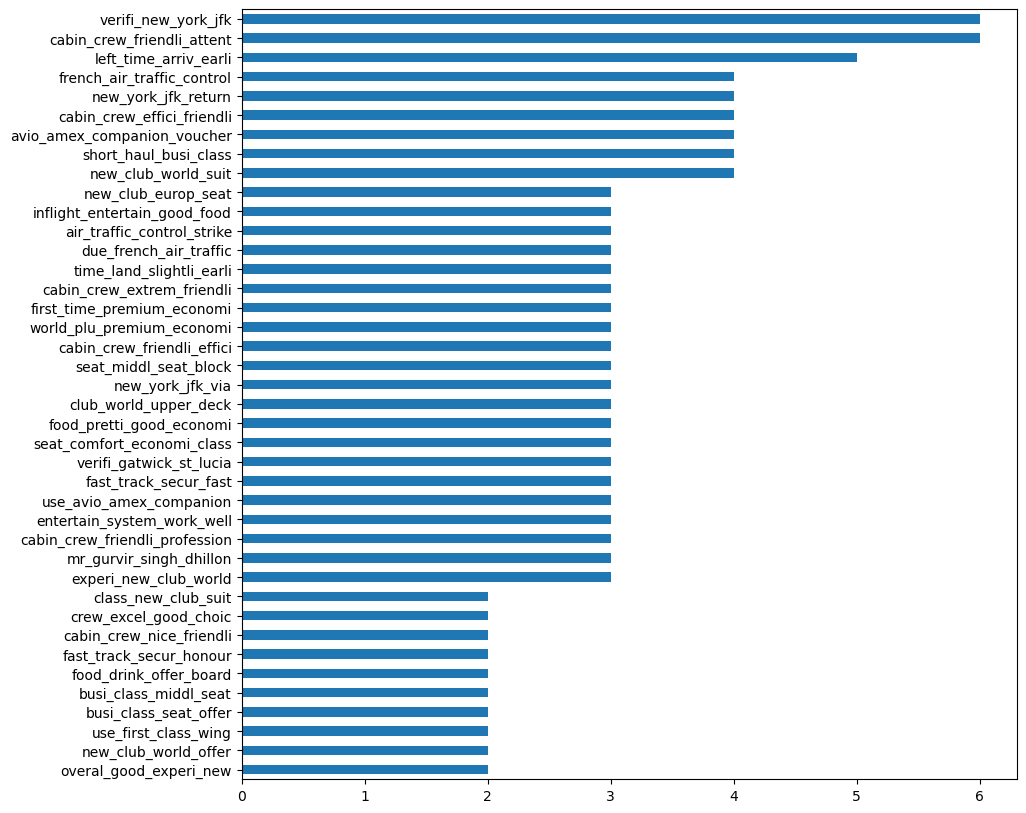

In [65]:
# Filter data based on total rating
bad_rating = df[df['Total Rating'].isin([1, 2, 3])]
avg_rating = df[df['Total Rating'].isin([4, 5, 6])]
good_rating = df[df['Total Rating'].isin([7, 8, 9, 10])]

# Join the content of bad, average, and good ratings
bad_review = " ".join(bad_rating['content'])
avg_review = " ".join(avg_rating['content'])
good_review = " ".join(good_rating['content'])

# Split the text of all reviews into a list
bad_words = bad_review.split(" ")
avg_words = avg_review.split(" ")
good_words = good_review.split(" ")

# Filter out stopwords
bad_words_filtered = [word for word in bad_words if word not in stopwords_list]
avg_words_filtered = [word for word in avg_words if word not in stopwords_list]
good_words_filtered = [word for word in good_words if word not in stopwords_list]

# Plot frequency distribution of good reviews
get_freq_dist(good_words_filtered, 4);

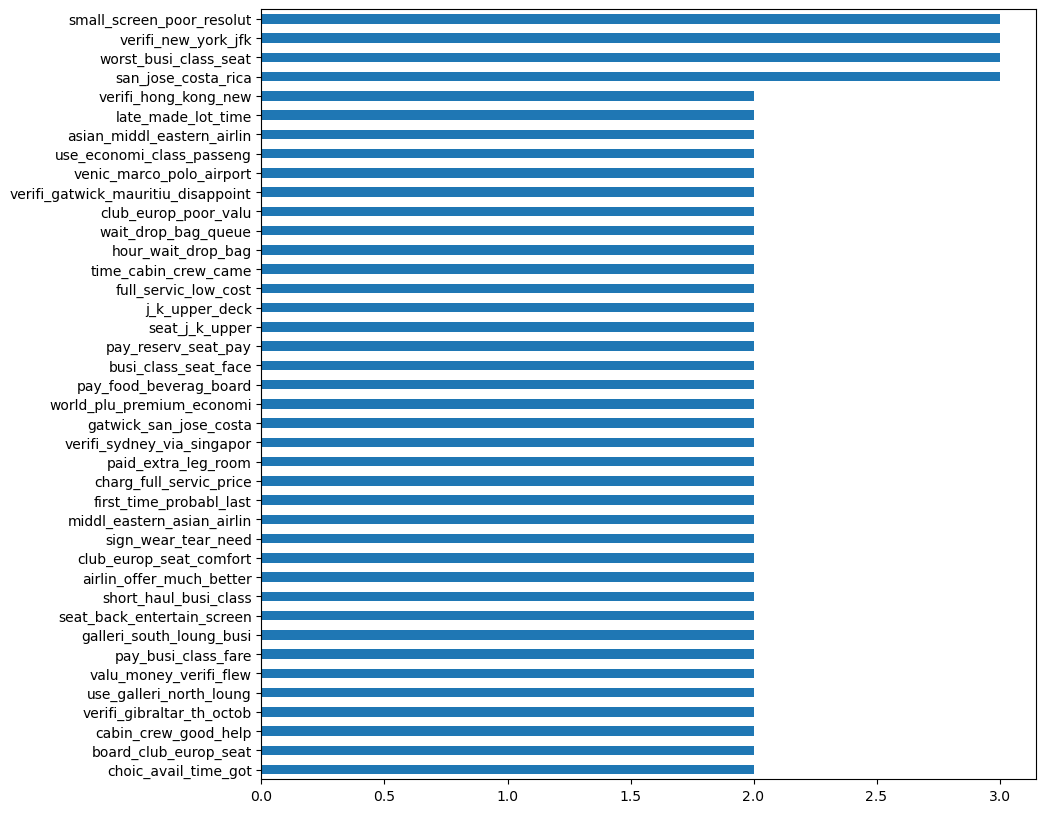

In [67]:
# Plot frequency distribution of avg. reviews
get_freq_dist(avg_words_filtered, 4);

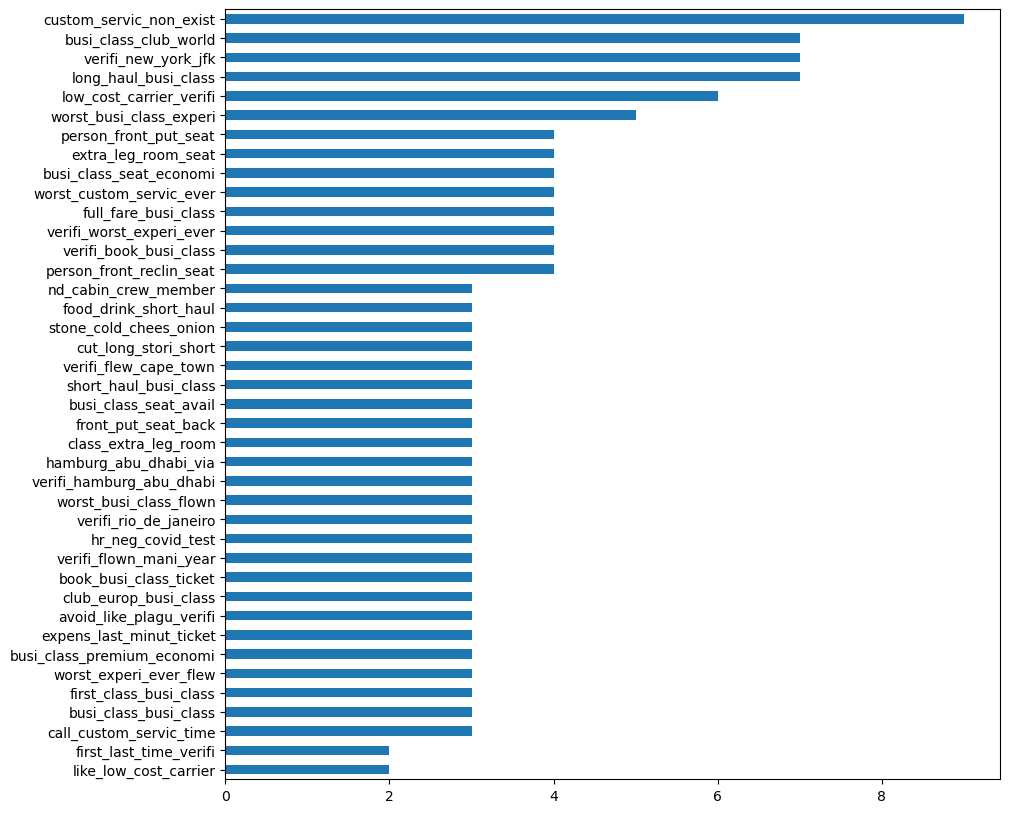

In [87]:
# Plot frequency distribution of bad reviews
get_freq_dist(bad_words_filtered, 4);

In [ ]:
#!pip install textblob

In [70]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Initialize a new column 'polarity' with all 0 values
df['polarity'] = 0

# Iterate over DataFrame rows and their indices
for index, row in df.iterrows():
    sent = TextBlob(row['content'])
    polarity = sent.sentiment.polarity  # Use sentiment.polarity
    subjectivity = sent.sentiment.subjectivity  # Use sentiment.subjectivity
    df.at[index, 'polarity'] = polarity  # Use .at to set values explicitly

# Checking the number of texts with positive comments
print(f"Number of texts with polarity between -0.2 and 0.2: {df[(df['polarity'] > -0.2) & (df['polarity'] < 0.2)].shape[0]}")
print(f"Number of texts with polarity between -0.1 and 0.1: {df[(df['polarity'] > -0.1) & (df['polarity'] < 0.1)].shape[0]}")

Number of texts with polarity between -0.2 and 0.2: 2057
Number of texts with polarity between -0.1 and 0.1: 1166


In [71]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Set a column 'label' with all 0 values initially
df['label'] = 0

# Iterate over DataFrame rows and their indices
for index, row in df.iterrows():
    score = sia.polarity_scores(row['content'])
    
    if score['compound'] > 0.2:
        df.at[index, 'label'] = 1
    elif score['compound'] < -0.2:
        df.at[index, 'label'] = -1
    else:
        df.at[index, 'label'] = 0

df['label'].value_counts()

label
 1    1838
-1     884
 0     285
Name: count, dtype: int64

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an object of count vectorizer
vect = CountVectorizer()

# Apply transformation
tf = vect.fit_transform(df['content']).toarray()

# Get feature names
tf_feature_names = vect.get_feature_names_out()

# Displaying first 10 feature names
# print(tf_feature_names[:10])

In [77]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic = pd.DataFrame(topic_dict)

In [78]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,hour,367.5,board,492.0,call,472.9,seat,1540.8,good,931.9,first,401.0,seat,490.1,seat,878.0
1,day,287.8,delay,360.3,custom,449.4,class,724.3,crew,843.7,servic,360.0,busi,429.7,book,423.8
2,cancel,281.9,check,339.7,get,444.3,busi,632.2,food,785.6,cabin,354.2,loung,413.4,airway,368.3
3,delay,275.6,hour,294.7,airway,411.6,economi,478.4,seat,711.7,class,296.9,servic,405.5,check,367.4
4,us,271.9,passeng,271.5,hour,370.9,food,351.9,time,699.7,crew,296.1,class,378.0,verifi,215.1
5,verifi,265.2,staff,232.1,servic,366.2,cabin,317.1,cabin,683.5,food,280.8,club,312.4,fli,191.8
6,trip,252.6,gate,229.2,verifi,323.4,verifi,282.6,servic,608.7,staff,258.9,good,264.9,paid,184.6
7,connect,228.3,verifi,225.3,check,312.4,premium,270.2,meal,562.0,loung,247.8,economi,260.0,pay,183.2
8,book,204.0,time,224.8,bag,301.1,crew,251.8,airway,514.2,verifi,223.9,europ,244.8,us,171.9
9,arriv,203.4,minut,212.1,time,289.3,servic,251.3,drink,501.2,seat,183.3,food,243.5,servic,164.6


#### Topic modeling with NMF

In [79]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.07498925, 0.05269395],
       [0.12641155, 0.        ],
       [0.10444997, 0.        ],
       ...,
       [0.        , 0.16158816],
       [0.        , 0.18249353],
       [0.        , 0.12174809]])

In [80]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [81]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,hour,8.5,seat,13.1
1,us,6.9,class,5.6
2,time,6.7,busi,4.8
3,servic,6.7,food,4.5
4,airway,6.5,cabin,4.5
5,get,6.3,servic,4.3
6,check,6.1,crew,4.3
7,custom,5.9,good,4.1
8,book,5.8,economi,3.5
9,day,5.4,board,3.0


Topic 0:
Words: 'hour', 'us', 'time', 'service', 'airway', 'get', 'check', 'customer', 'book', 'day'
Weights: 8.5, 6.9, 6.7, 6.7, 6.5, 6.3, 6.1, 5.9, 5.8, 5.4
Interpretation: This topic seems to be related to customer service experience and booking process.
The words like 'hour', 'time', and 'day' might indicate discussions about timeliness and scheduling.
Terms like 'service', 'get', 'check', and 'customer' suggest mentions of customer service experiences, possibly including check-in procedures, assistance during the flight, and overall service quality.
'Book' indicates discussions related to the booking process, such as online booking, ticket reservation, or seat selection.

Topic 1:
Words: 'seat', 'class', 'business', 'food', 'cabin', 'service', 'crew', 'good', 'economy', 'board'
Weights: 13.1, 5.6, 4.8, 4.5, 4.5, 4.3, 4.3, 4.1, 3.5, 3.0
Interpretation: This topic appears to be focused on in-flight experience and cabin services.
The word 'seat' has the highest weight, indicating a significant emphasis on seat comfort or seat selection.
'Class', 'business', 'economy', and 'board' suggest discussions related to different travel classes and boarding processes.
'Food' indicates mentions of in-flight meals or food service quality.
Terms like 'cabin', 'service', and 'crew' likely refer to the cabin crew and their service delivery during the flight.
'Good' suggests positive sentiments, possibly indicating satisfaction with the overall flight experience.

Overall Interpretation: Topic 0 seems to capture discussions related to the booking process and customer service, while Topic 1 focuses on the in-flight experience, including seat comfort, food service, and interactions with the cabin crew.
These topics provide valuable insights into the key themes and aspects of the airline passenger experience, highlighting areas of strength and areas for potential improvement.
Analyzing these topics can help airlines understand customer preferences, identify pain points, and tailor their services to meet customer needs more effectively.